Огромная благодарнасть выражается автору кода с сайта https://python-scripts.com/build-neural-network, чей код помог разобраться в основах работы с нейронными сетями и сделать 4 домашнее задание. А также, своим одногруппникам Мурзаеву Ярослау, Макрополе Юрию, Грибовой Ольге и Пастушкову Сергею за помощь в решении технических вопросов и проблем.

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
from IPython.display import clear_output
import matplotlib.pyplot as plt
from numpy import random
import numpy as np

## Инициализация Гипер-параметров
Гипер-параметры – это мощные аргументы с предварительной настройкой и не будут обновляться в ходе изучения нейронной сети.

In [2]:
input_size = 784       # Размеры изображения = 28 x 28 = 784
hidden_size = 50        # Количество узлов на скрытом слое
num_classes = 10       # Число классов на выходе. В этом случае от 0 до 9
num_epochs = 5         # Количество тренировок всего набора данных
batch_size = 100       # Размер входных данных для одной итерации
learning_rate = 0.001  # Скорость конвергенции

Установим параметры шрифтов и размеров

In [45]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['figure.figsize'] = 13, 13

## Загрузка набора данных MNIST
MNIST – это огромная база данных с тоннами прописанных чисел (т.е. от 0 до 9), которая направлена на обработку изображений.

Загрузка набора данных. После загрузки MNIST, мы загружаем набор данных в наш код:

In [46]:
train_dataset = dsets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
 
test_dataset = dsets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor()
)

## Пример объекта выборки

D:\Anaconda\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


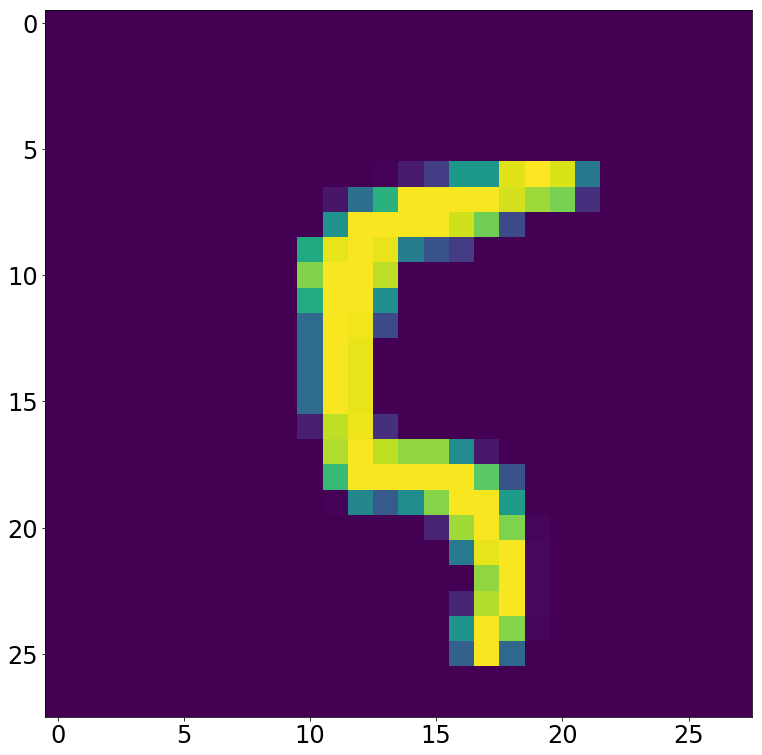

In [47]:
plt.imshow(train_dataset.__getitem__(100)[0].reshape((28,28)))

In [48]:
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)
 
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

## Создаем нейронную сеть Feedforward

In [49]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()                    # Наследуемый родительским классом nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size)  # 1й связанный слой: 784 (данные входа) -> 50 (скрытый узел)
        self.relu = nn.ReLU()                          # Нелинейный слой ReLU max(0,x)
        self.fc2 = nn.Linear(hidden_size, num_classes) # 2й связанный слой: 50 (скрытый узел) -> 10 (класс вывода)
    
    def forward(self, x):                              # Передний пропуск: складывание каждого слоя вместе
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

Структура модели нейросети
Нейронная сеть включает в себя два полностью соединенных слоя (т.е. fc1 и fc2) и нелинейный слой ReLU между ними. 
Как правило, мы называем эту структуру 1-скрытый слой нейросети, отбрасывая слой вывода (fc2).
https://python-scripts.com/wp-content/uploads/2018/02/Feedforward.png
Запустив следующий код, указанные изображения (х) могут пройти через нейронную сеть и сгенерировать вывод (out), показывая, 
как именно соответствие принадлежит каждому из 10 классов. Например, изображение кошки соответствует изображению собаки на 0.8, 
в то врем я как соответствие изображению самолета – 0.3.

In [58]:
net = Net(input_size, hidden_size, num_classes)

In [59]:
#net.cuda() # Вы можете прокомментировать (#) эту строку для отключения GPU

## Выбираем функцию потерь и оптимизатор

In [60]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

## Тренируем нейросеть

D:\Anaconda\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


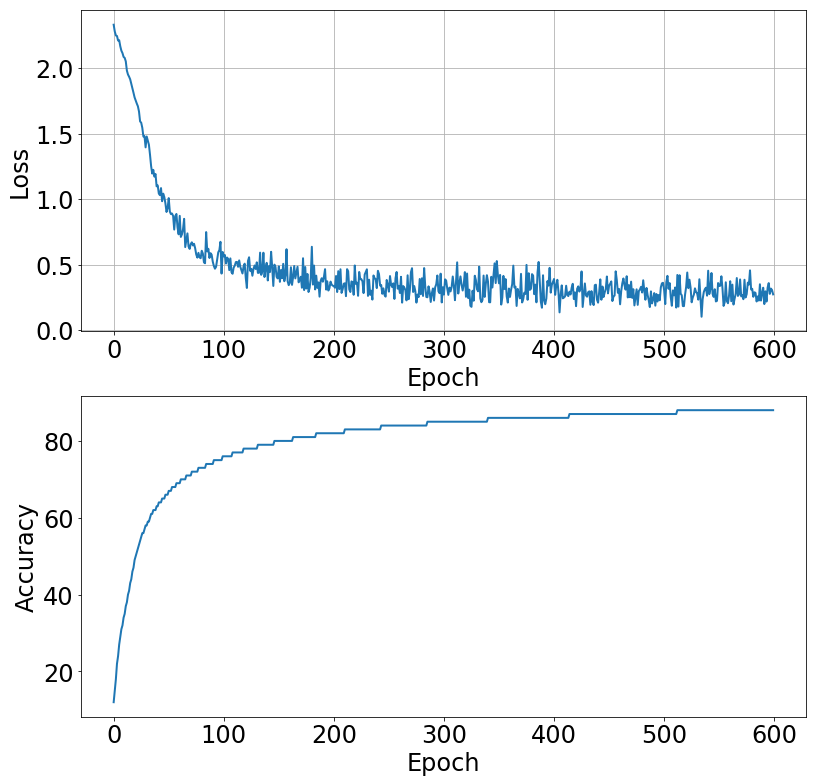

In [61]:
history = []
accur = []
#for epoch in range(num_epochs):
correct = 0
total = 0
for i, (images_train, labels_train) in enumerate(train_loader):   # Загрузка партии изображений с индексом, данными, классом
    images_train = Variable(images_train.view(-1, 28*28))         # Конвертация тензора в переменную: изменяем изображение с вектора, размером 784 на матрицу 28 x 28
    labels_train = Variable(labels_train)
       
    optimizer.zero_grad()                             # Инициализация скрытых масс до нулей
    outputs = net(images_train)                             # Передний пропуск: определение выходного класса, данного изображения
    loss = criterion(outputs, labels_train)                 # Определение потерь: разница между выходным классом и предварительно заданной меткой
    loss.backward()                                   # Обратный проход: определение параметра weight
    optimizer.step()                                  # Оптимизатор: обновление параметров веса в скрытых узлах
    history.append(loss.data.numpy())
     
    for j, (images_test, labels_test) in enumerate(test_loader):
        images_test = Variable(images_test.view(-1, 28*28))
        outputs = net(images_test)
        _, predicted = torch.max(outputs.data, 1)  # Выбор лучшего класса из выходных данных: класс с лучшим счетом
        total += labels_test.size(0)                    # Увеличиваем суммарный счет
        correct += (predicted == labels_test).sum()     # Увеличиваем корректный счет
       
    accur.append(100*correct/total)
        #if (i+1) % 100 == 0:                              # Логирование
            
#clear_output(True)
           
fig, axs = plt.subplots(2, 1)
fig = plt.figure(figsize=(16,10))
axs[0].plot(history)
axs[0].set_xlabel('Number of Iteration')
axs[0].set_ylabel('Loss')
axs[0].grid(True)
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Number of Iteration')
axs[1].plot(accur)
fig.tight_layout()
            
plt.show()
    #print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))
                 #%(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))
print('Accuracy of the network on the 10K test images: %d %%' % (100 * correct / total))

## 2) Изучим влияение шума на скорость обучения нейросети.

Будем накладывать на выборку шум с помощью гауссовсоко распределения с фиксированным средним $\mathbb{E}x = 20$ (выбор среднего был произволен) и с различной дисперсией.

In [75]:
def gauss(x, variance):
    noize_normal = np.random.normal(20, variance, size = np.array(x).shape)
    np_to_image = np.array(x) + np.abs(noize_normal)
    np_expand_dims = np.expand_dims(np_to_image, axis=2)
    return np.uint8(np_expand_dims)

In [76]:
train_noised_dataset = dsets.MNIST(
    root='./data',
    train=True,
    transform=transforms.Compose(
        [
            transforms.Lambda(lambda x: gauss(x, 50)) ,
            transforms.ToPILImage() ,
            transforms.ToTensor()
        ]),
    download=True
)
 
test_dataset = dsets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor()
)

## Пример объекта выборки после наложения шума

D:\Anaconda\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


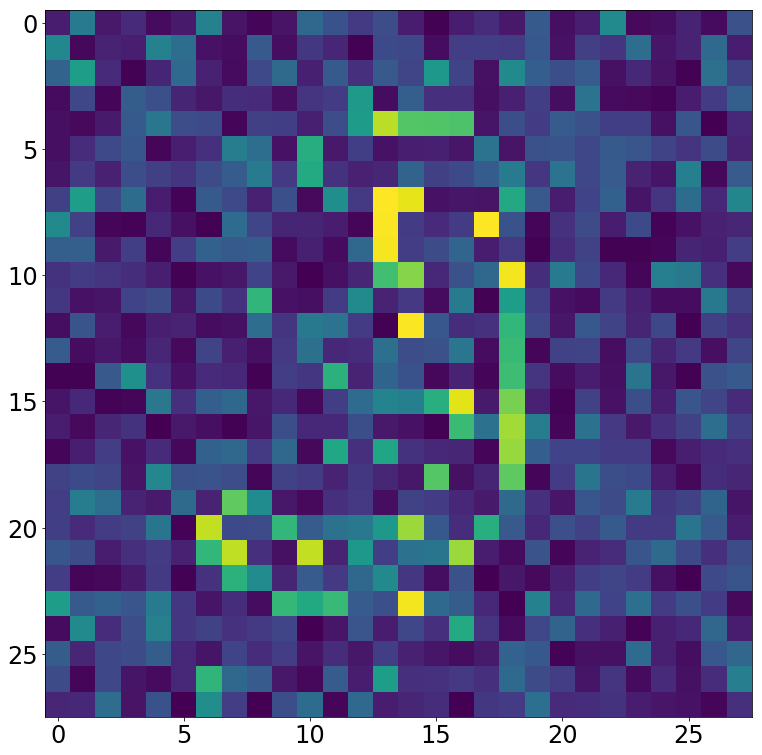

In [77]:
plt.imshow(train_noised_dataset.__getitem__(10)[0].reshape((28,28)))

D:\Anaconda\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


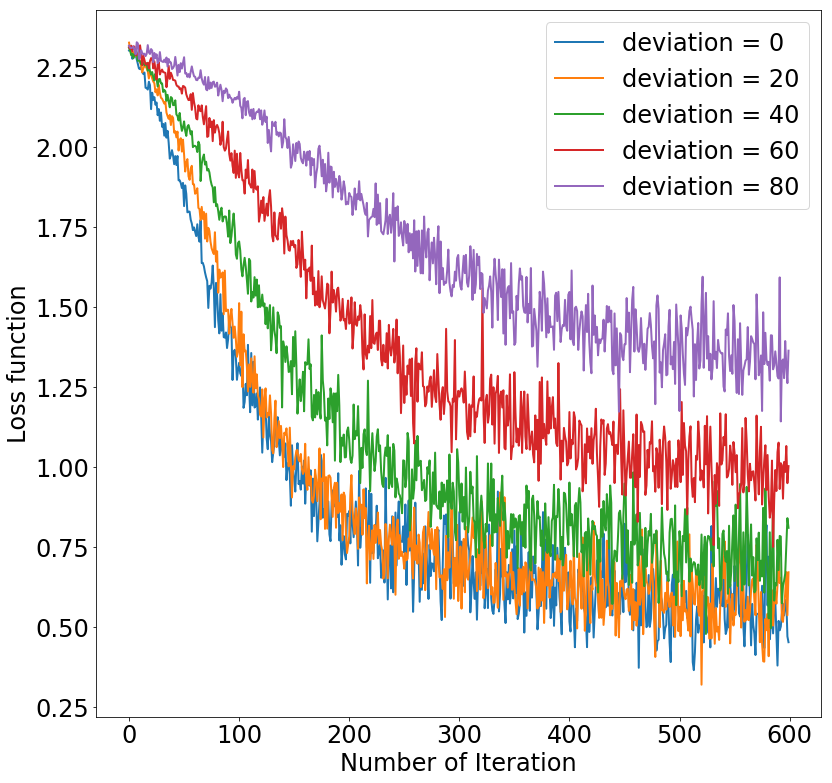

In [85]:
plt.xlabel('Number of Iteration')
plt.ylabel('Loss function')
for variance in np.arange(0, 100, 20):
    
    train_noised_dataset = dsets.MNIST(
    root='./data',
    train=True,
    transform=transforms.Compose(
        [
            transforms.Lambda(lambda x: gauss(x, variance)) ,
            transforms.ToPILImage() ,
            transforms.ToTensor()
        ]),
    download=True
    )
    
    train_noised_loader = torch.utils.data.DataLoader(
    dataset=train_noised_dataset,
    batch_size=batch_size,
    shuffle=True
    )
    
    net = Net(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    
    history = []
    for i, (images_train, labels_train) in enumerate(train_noised_loader):   # Загрузка партии изображений с индексом, данными, классом
        images_train = Variable(images_train.view(-1, 28*28))         # Конвертация тензора в переменную: изменяем изображение с вектора, размером 784 на матрицу 28 x 28
        labels_train = Variable(labels_train)

        optimizer.zero_grad()                             # Инициализация скрытых масс до нулей
        outputs = net(images_train)                             # Передний пропуск: определение выходного класса, данного изображения
        loss = criterion(outputs, labels_train)                 # Определение потерь: разница между выходным классом и предварительно заданной меткой
        loss.backward()                                   # Обратный проход: определение параметра weight
        optimizer.step()                                  # Оптимизатор: обновление параметров веса в скрытых узлах
        history.append(loss.data.numpy())

    plt.plot(history, label = 'deviation = %s' % variance)
plt.legend()
plt.show()

## 3) Изучим зависимость скорости обучения от объема выборки

D:\Anaconda\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


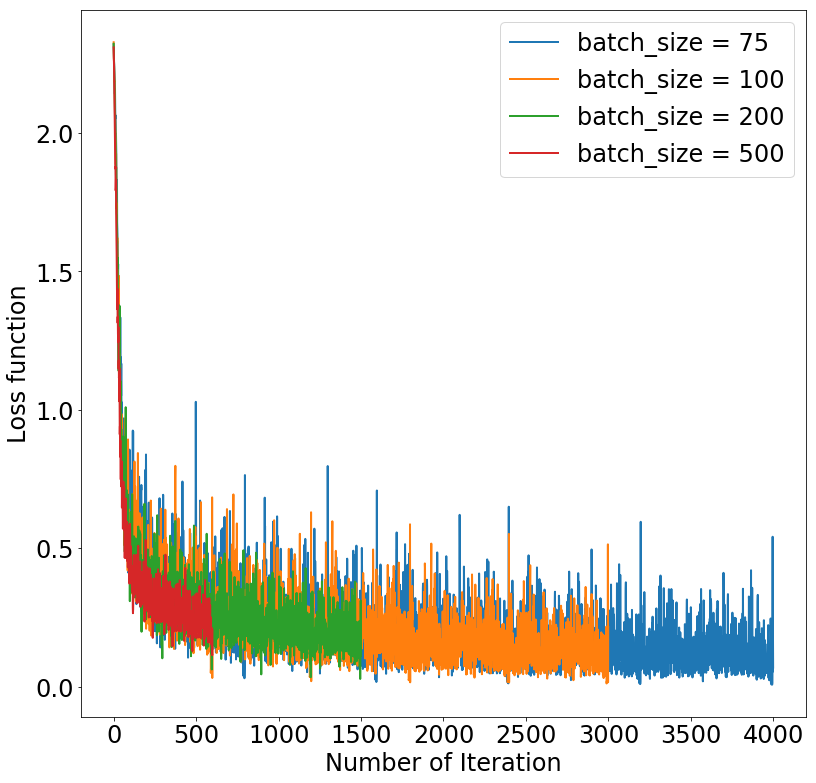

In [110]:
plt.xlabel('Number of Iteration')
plt.ylabel('Loss function')
for batch_sizes in [75, 100, 200, 500]:
    
    train_batched_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_sizes,
    shuffle=False
    )
    
    net = Net(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    
    history = np.array([])
    for epoch in range(num_epochs):
        for i, (images_train, labels_train) in enumerate(train_batched_loader):   # Загрузка партии изображений с индексом, данными, классом
            images_train = Variable(images_train.view(-1, 28*28))         # Конвертация тензора в переменную: изменяем изображение с вектора, размером 784 на матрицу 28 x 28
            labels_train = Variable(labels_train)

            optimizer.zero_grad()                             # Инициализация скрытых масс до нулей
            outputs = net(images_train)                             # Передний пропуск: определение выходного класса, данного изображения
            loss = criterion(outputs, labels_train)                 # Определение потерь: разница между выходным классом и предварительно заданной меткой
            loss.backward()                                   # Обратный проход: определение параметра weight
            optimizer.step()                                  # Оптимизатор: обновление параметров веса в скрытых узлах
            history = np.append(history, loss.data.numpy())
    del train_batched_loader
    plt.plot(history, label = 'batch_size = %s' % batch_sizes)
plt.legend()
plt.show()

## Выводы:

В ходе работы было установлено, что наличие шума влияет на скорость обучения. Чем сильнее шум, тем больше времени нужно на обучение. От объема выборки скорость обучения, как оказалось почти не зависит. 